<a href="https://colab.research.google.com/github/meghamkpatel/Skunks_Skool/blob/main/INFO_6105/AutoML/AutoML_Zomato_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Sci Eng Methods 
## Assignment 2 – Zomato_EDA

*ML Data Cleaning and Feature Selection*


# Abstract

Zomato is an Indian multinational restaurant aggregator and food delivery company. 

Zomato provides information, menus and user-reviews of restaurants as well as food delivery options from partner restaurants in select cities. 
This dataset is comprised of information of food restraunts in Banglaore working with Zomato.

Reference: https://www.kaggle.com/datasets/pranavuikey/zomato-eda

The aim of the Notebook is to check the quality of the data and determine which features are important. The notebook has used statistical methods like p-value, t-statistics and visualization techniques like histogram, Q-Q plot, scatter plot, box-plot of python's matplotlib and seaborn library to answer below questions about the dataset:
<br>•	Which independent variables are useful to predict a target (dependent variable)?
<br>•	Which independent variables have missing data? How much
<br>•	Do the training and test sets have the same data?
<br>•	In the predictor variables independent of all the other predictor variables?
<br>•	Which predictor variables are the most important?
<br>•	Do the ranges of the predictor variables make sense?
<br>•	What are the distributions of the predictor variables?

<br>The dataset contains inconsistant values and missing data so it will require cleaning up. The significance of the predictors is investigated and it appears that of the 16 independent variables,  9 are significant, these results can be used to further optimize the model for predicting the best restaurants depending on a customer's need.
   


_________________________________________________________
###Getting our data

This dataset contains 51717 data values which is above GitHub's threshold of .csv files. Accordingly, we pull in the kaggle dataset directly using the kaggle library and my kaggle credentials.

In [1]:
#installing dependencies
!pip install eli5
! pip install -q kaggle
#installing h2o
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [2]:
#making a directory for kaggle api
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
#importing all necessary libraries
%matplotlib inline  
import random, os, sys
import h2o
import pprint
import operator
import matplotlib
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from tabulate import tabulate
from h2o.automl import H2OAutoML
from datetime import datetime
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil

Saving kaggle.json to kaggle (2).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
#downloading and reading the zomato dataset
! kaggle datasets list -s zomato # searching through kaggle with keyword 'zomato'
! kaggle datasets download -d pranavuikey/zomato-eda
!unzip zomato-eda.zip

ref                                                          title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
himanshupoddar/zomato-bangalore-restaurants                  Zomato Bangalore Restaurants                        89MB  2019-03-31 09:48:43          46375       1163  1.0              
shrutimehta/zomato-restaurants-data                          Zomato Restaurants Data                              5MB  2018-03-13 04:56:25          44534        620  0.7941176        
batjoker/zomato-restaurants-hyderabad                        Zomato Restaurants Hyderabad                         1MB  2020-06-08 15:11:39           3121         62  1.0              
rishikeshkonapure/zomato                                     Zomato             

In [4]:
#Viewing data in the file 
data = pd.read_csv("zomato.csv")
data.shape
data.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

#Cleaning Up Data


###Dropping columns 

The columns phone, dish_liked, url, menu_item, and reviews_list help identify the restaurant but do not add characteristics to the dataset so we can drop them. 

In [5]:
data.drop(['url','address','phone','menu_item','dish_liked','reviews_list',"listed_in(city)"],axis = 1,inplace=True)
data.head(3)

name online_order book_table   rate  votes      location  \
0            Jalsa          Yes        Yes  4.1/5    775  Banashankari   
1   Spice Elephant          Yes         No  4.1/5    787  Banashankari   
2  San Churro Cafe          Yes         No  3.8/5    918  Banashankari   

             rest_type                        cuisines  \
0        Casual Dining  North Indian, Mughlai, Chinese   
1        Casual Dining     Chinese, North Indian, Thai   
2  Cafe, Casual Dining          Cafe, Mexican, Italian   

  approx_cost(for two people) listed_in(type)  
0                         800          Buffet  
1                         800          Buffet  
2                         800          Buffet

#### Renaming Column Headers
To better understand the data, let's first rename our column headers with appropriate units and descripter language. 

In [6]:
data.rename(columns={'name':'Restaurant','online_order': 'Online Ordering?', 'book_table':'Reservation Needed?','votes': 'Number of Votes','location':'City','rest_type': 'Restaurant Type', 'cuisines': 'Cuisines','rate':'Rating','approx_cost(for two people)':'Cost(Rupees)','listed_in(type)':'Meal Type'},inplace=True)
data.head(3)

Restaurant Online Ordering? Reservation Needed? Rating  \
0            Jalsa              Yes                 Yes  4.1/5   
1   Spice Elephant              Yes                  No  4.1/5   
2  San Churro Cafe              Yes                  No  3.8/5   

   Number of Votes          City      Restaurant Type  \
0              775  Banashankari        Casual Dining   
1              787  Banashankari        Casual Dining   
2              918  Banashankari  Cafe, Casual Dining   

                         Cuisines Cost(Rupees) Meal Type  
0  North Indian, Mughlai, Chinese          800    Buffet  
1     Chinese, North Indian, Thai          800    Buffet  
2          Cafe, Mexican, Italian          800    Buffet

###Missing Data

Imputing Missing Data:
We have three methods for imputing missing data. Using the median, dropping, and using machine learning. 

In [7]:
missing_list = data.columns[data.isna().any()].tolist() 
missing_count = []      
for i in missing_list:
  missing_count.append(sum(pd.isnull(data[str(i)])))

d = {'Missing_Column':missing_list,'Missing_Values':missing_count}
Missing_DF = pd.DataFrame(d)
Missing_DF["%_Missing"] = (Missing_DF['Missing_Values'] / data.shape[0]) * 100
Missing_DF

Missing_Column  Missing_Values  %_Missing
0           Rating            7775  15.033741
1             City              21   0.040606
2  Restaurant Type             227   0.438927
3         Cuisines              45   0.087012
4     Cost(Rupees)             346   0.669026

We see that most of our missing data is Rating. The median method in this case would not make sense for null values because rating for a restaurant should not be effected by the rest of the data. For example, a new restaurant that did not get the chance pass the inspection exam with rating "NEW" should not be replaced by a 3 star rating when there is an equal chance the restaurant could be of lower or higher quality. We could potentially explore Machine Learning but for the purposes of the training data we can justify using the dropping method for columns that are missing 5% or less of data since it is a very small percentage of missing data.
Note: I chose to drop NaN but other notebooks chose to use the mean to replace empty values.

In [8]:
data = data.dropna()
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30958 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Restaurant           30958 non-null  object
 1   Online Ordering?     30958 non-null  object
 2   Reservation Needed?  30958 non-null  object
 3   Rating               30958 non-null  object
 4   Number of Votes      30958 non-null  int64 
 5   City                 30958 non-null  object
 6   Restaurant Type      30958 non-null  object
 7   Cuisines             30958 non-null  object
 8   Cost(Rupees)         30958 non-null  object
 9   Meal Type            30958 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.6+ MB


In [9]:
data.isnull().sum()

Restaurant             0
Online Ordering?       0
Reservation Needed?    0
Rating                 0
Number of Votes        0
City                   0
Restaurant Type        0
Cuisines               0
Cost(Rupees)           0
Meal Type              0
dtype: int64

#### Remove Duplicates
In case we have any duplicated rows, we remove duplicates. This is ensure there is no bias with repeating restaurants.

In [10]:
data.drop_duplicates(inplace=True)
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30958 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Restaurant           30958 non-null  object
 1   Online Ordering?     30958 non-null  object
 2   Reservation Needed?  30958 non-null  object
 3   Rating               30958 non-null  object
 4   Number of Votes      30958 non-null  int64 
 5   City                 30958 non-null  object
 6   Restaurant Type      30958 non-null  object
 7   Cuisines             30958 non-null  object
 8   Cost(Rupees)         30958 non-null  object
 9   Meal Type            30958 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.6+ MB


### Clean up individual columns
Finally, we should check each variable and clean out data that does not make sense. This can either mean standardizing what "null" means in that context or removing random characters from changing data formats from object to integer



##### *Rating*

In [11]:
data['Rating'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

By displaying all unique values from the Rating column, we see that some entries contain "NEW", "nan", and "-" representing no ratings. We can standardize empty values to be nan. We also see that the Rating field contains strings of a floating number out of 5. To prepare for analyzing our data, we will extract the rating, setting the variable to be of type float. 

In [12]:
def clean(value):
    if value=='NEW' or value=='-':
        return np.nan
    else:
        value=str(value).split('/')
        value=value[0]
        return float(value)
    
data['Rating']=data['Rating'].apply(clean)
data['Rating'].head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30958 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Restaurant           30958 non-null  object 
 1   Online Ordering?     30958 non-null  object 
 2   Reservation Needed?  30958 non-null  object 
 3   Rating               29638 non-null  float64
 4   Number of Votes      30958 non-null  int64  
 5   City                 30958 non-null  object 
 6   Restaurant Type      30958 non-null  object 
 7   Cuisines             30958 non-null  object 
 8   Cost(Rupees)         30958 non-null  object 
 9   Meal Type            30958 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 2.6+ MB


In [13]:
data['Rating'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

##### *Location*


In [14]:
data['City'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'CV Raman Nagar', 'Electronic City', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Marathahalli', 'Koramangala 7th Block', 'Bellandur',
       'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'MG Road', 'Brigade Road', 'Lavelle Road',
       'Church Street', 'Ulsoor', 'Residency Road', 'Shivajinagar',
       'Infantry Road', 'St. Marks Road', 'Cunningham Road',
       'Race Course Road', 'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramanga

In [15]:
data['City'].value_counts(ascending=False)

BTM                      2228
Indiranagar              1653
Whitefield               1630
Koramangala 5th Block    1577
HSR                      1558
                         ... 
Central Bangalore           5
Yelahanka                   4
Rajarajeshwari Nagar        2
Nagarbhavi                  1
Peenya                      1
Name: City, Length: 92, dtype: int64

Looking at the breakdown of cities we see no typos or errors and can proceed.

##### *Cost*


In [16]:
data['Cost(Rupees)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

Examining the unique values of Cost, we can see that the cost is stored as text with type object. We can correct the type to integer so that we can later model the variables.





In [17]:
data = data.dropna()

In [18]:
def money(value):
    value=str(value)
    if ',' in value:
        value=value.replace(',','')
        return int(value)
    else:
        return int(value)

data['Cost(Rupees)']=data['Cost(Rupees)'].apply(money)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29638 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Restaurant           29638 non-null  object 
 1   Online Ordering?     29638 non-null  object 
 2   Reservation Needed?  29638 non-null  object 
 3   Rating               29638 non-null  float64
 4   Number of Votes      29638 non-null  int64  
 5   City                 29638 non-null  object 
 6   Restaurant Type      29638 non-null  object 
 7   Cuisines             29638 non-null  object 
 8   Cost(Rupees)         29638 non-null  int64  
 9   Meal Type            29638 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 2.5+ MB


##### *Booking*


In [20]:
data['Reservation Needed?'].unique()

array(['Yes', 'No'], dtype=object)

Booking has no typos so we can proceed.

##### *Online Order*


In [21]:
data['Online Ordering?'].unique()

array(['Yes', 'No'], dtype=object)

Online Ordering has no typos so we can proceed.

##### *Restaurant Type*


In [22]:
data['Restaurant Type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Court, 

In [23]:
data['Restaurant Type'].value_counts(ascending=False)

Quick Bites                   9492
Casual Dining                 7151
Cafe                          2420
Dessert Parlor                1309
Delivery                      1054
                              ... 
Bakery, Food Court               2
Food Court, Beverage Shop        2
Bakery, Beverage Shop            1
Quick Bites, Kiosk               1
Dessert Parlor, Food Court       1
Name: Restaurant Type, Length: 87, dtype: int64

The Restaurant type has lots of values with multiple values for one restaurant. We can simplify the types to general group for better analysis.

In [24]:
def typeSimplify(value):
    value = str(value)
    if 'Sweet' in value or 'Dessert' in value or 'Confectionery' in value:
        return 'Dessert'
    elif 'Quick Bites' in value:
      return 'Quick Bites'
    elif 'Bar' in value or 'Microbrewery' in value:
      return 'Bar'
    elif 'Bakery' in value:
      return 'Bakery'
    elif 'Casual Dining' in value:
      return 'Casual Dining'
    elif 'Fine Dining' in value:
      return 'Fine Dining'
    elif 'Food Court' in value:
      return 'Street Food'
    elif 'Fast Food' in value:
      return 'Fast Food'
    elif 'Cafe' in value:
      return 'Cafe'
    elif 'North Indian' in value:
      return 'North Indian'
    elif 'South Indian' in value:
      return 'South Indian'
    else:
        return value
    
data['Restaurant Type']=data['Restaurant Type'].apply(typeSimplify)
data['Restaurant Type'].head(10)

0    Casual Dining
1    Casual Dining
2    Casual Dining
3      Quick Bites
4    Casual Dining
5    Casual Dining
6    Casual Dining
7    Casual Dining
8             Cafe
9             Cafe
Name: Restaurant Type, dtype: object

In [25]:
data['Restaurant Type'].unique()

array(['Casual Dining', 'Quick Bites', 'Cafe', 'Delivery', 'Mess',
       'Dessert', 'Pub', 'Bakery', 'Takeaway, Delivery', 'Fine Dining',
       'Beverage Shop', 'Bar', 'Kiosk', 'Food Truck', 'Takeaway',
       'Lounge', 'Street Food', 'Dhaba', 'Club', 'Bhojanalya'],
      dtype=object)

In [26]:
data['Restaurant Type'].isnull().sum()

0

##### *Meal Type*


In [27]:
data['Meal Type'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [28]:
data['Meal Type'].value_counts()

Delivery              13504
Dine-out              10867
Desserts               2031
Cafes                  1136
Drinks & nightlife      877
Buffet                  655
Pubs and bars           568
Name: Meal Type, dtype: int64

Meal Type has no typos so we can proceed.

##### *Cuisines*


In [29]:
data['Cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ..., 'Tibetan, Nepalese',
       'North Indian, Street Food, Biryani',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [30]:
data['Cuisines'].value_counts()

North Indian                                1518
North Indian, Chinese                       1339
South Indian                                 851
Bakery, Desserts                             455
Biryani                                      410
                                            ... 
South Indian, Mangalorean, Chinese             1
Fast Food, Andhra                              1
Kerala, Biryani, North Indian, Chettinad       1
North Indian, Street Food, Fast Food           1
North Indian, Chinese, Arabian, Momos          1
Name: Cuisines, Length: 2367, dtype: int64

Cuisines have multiple values for one restaurant with repeating keywords but they show has different categories. We can simplify this to general groups for better analysis. 

In [31]:
data['Cuisines'].isnull().sum()

0

In [32]:
def cuisineSimplify(value):
    value = str(value)
    if 'Italian' in value or 'Pizza' in value:
        return 'Italian'
    elif 'African' in value:
      return 'African'
    elif 'Continental' in value:
      return 'Continental'
    elif "Mughlai" in value or 'Middle Eastern' in value or 'Biryani' in value or 'Arabian' in value or 'Turkish' in value:
      return 'Middle Eastern'
    elif 'Burger' in value or 'American' in value or 'Salad' in value or 'Sandwich' in value:
      return 'American'
    elif 'Indian' in value and 'Chinese' in value:
      return 'Asian Fusion'
    elif 'Thai' in value or 'Japanese' in value or 'Asian' in value or 'Chinese' in value or 'Tibetan' in value or 'Momo' in value:
      return 'Asian'
    elif 'Mexican' in value:
      return 'Mexican'
    elif 'Street Food' in value:
      return 'Street Food'
    elif 'Fast Food' in value:
      return 'Fast Food'
    elif 'Cafe' in value:
      return 'Cafe'
    elif 'North Indian' in value or 'Rajasthani' in value or "Gujarati" in value or 'Bengali' in value:
      return 'North Indian'
    elif 'South Indian' in value or 'Kerala' in value or 'Bengali' in value or 'Andhra' in value or 'Maharashtrian':
      return 'South Indian'
    elif 'Mediterranean' in value:
      return 'Mediterranean'
    elif 'Sweet' in value or 'Dessert' in value or 'Confectionery' in value or 'Mithai' in value:
      return 'Dessert'
    elif 'Cafe' in value:
      return 'Cafe'
    else:
        return value
    
data['Cuisines']=data['Cuisines'].apply(cuisineSimplify)
data['Cuisines'].head(10)


0    Middle Eastern
1      Asian Fusion
2           Italian
3      North Indian
4      North Indian
5      North Indian
6      Asian Fusion
7           Italian
8           Italian
9           Italian
Name: Cuisines, dtype: object

In [33]:
data['Cuisines'].unique()

array(['Middle Eastern', 'Asian Fusion', 'Italian', 'North Indian',
       'Cafe', 'Continental', 'Fast Food', 'American', 'South Indian',
       'Asian', 'Street Food', 'African', 'Mexican'], dtype=object)

##### *Restaurant*

In [34]:
data['Restaurant'].unique()

array(['Jalsa', 'Spice Elephant', 'San Churro Cafe', ...,
       'The Nest - The Den Bengaluru', 'Nawabs Empire',
       'SeeYa Restaurant'], dtype=object)

In [35]:
data.groupby('Restaurant').count().head()

Online Ordering?  Reservation Needed?  \
Restaurant                                                                    
#FeelTheROLL                                         2                    2   
#L-81 Cafe                                           4                    4   
#refuel                                              3                    3   
1000 B.C                                             2                    2   
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C                 2                    2   

                                      Rating  Number of Votes  City  \
Restaurant                                                            
#FeelTheROLL                               2                2     2   
#L-81 Cafe                                 4                4     4   
#refuel                                    3                3     3   
1000 B.C                                   2                2     2   
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C       2                2     2   

                                      Restaurant Type  Cuisines  Cost(Rupees)  \
Restaurant                                                                      
#FeelTheROLL                                        2         2             2   
#L-81 Cafe                                          4         4             4   
#refuel                                             3         3             3   
1000 B.C                                            2         2             2   
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C                2         2             2   

                                      Meal Type  
Restaurant                                       
#FeelTheROLL                                  2  
#L-81 Cafe                                    4  
#refuel                                       3  
1000 B.C                                      2  
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C          2

Restaurant names have some funky character so we must clear that out for better reads. 

In [36]:
#Remove random characters

data['Restaurant']=data['Restaurant'].str.replace('[Ãx][^A-Za-z]+','',regex=True)

In [37]:
data.groupby('Restaurant').count().head()

Online Ordering?  Reservation Needed?  Rating  Number of Votes  \
Restaurant                                                                     
#FeelTheROLL                 2                    2       2                2   
#L-81 Cafe                   4                    4       4                4   
#refuel                      3                    3       3                3   
1000 B.C                     2                    2       2                2   
100C                         2                    2       2                2   

              City  Restaurant Type  Cuisines  Cost(Rupees)  Meal Type  
Restaurant                                                              
#FeelTheROLL     2                2         2             2          2  
#L-81 Cafe       4                4         4             4          4  
#refuel          3                3         3             3          3  
1000 B.C         2                2         2             2          2  
100C             2                2         2             2          2

In [38]:
data = data.dropna(subset=['Number of Votes'])

In [39]:
data['Number of Votes'].unique()

array([ 775,  787,  918, ..., 4957, 2382,  843])

# Data transforming, Feature creation and Analysis

In [40]:
data.drop(['Restaurant'],axis = 1,inplace=True)

In [41]:
data['Reservation Needed?'] = data['Reservation Needed?'].map({'Yes': 1, 'No': 0})

In [42]:
data['Online Ordering?'] = data['Online Ordering?'].map({'Yes': 1, 'No': 0})

In [43]:
data = data.dropna()

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29638 entries, 0 to 51716
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Online Ordering?     29638 non-null  int64  
 1   Reservation Needed?  29638 non-null  int64  
 2   Rating               29638 non-null  float64
 3   Number of Votes      29638 non-null  int64  
 4   City                 29638 non-null  object 
 5   Restaurant Type      29638 non-null  object 
 6   Cuisines             29638 non-null  object 
 7   Cost(Rupees)         29638 non-null  int64  
 8   Meal Type            29638 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 2.3+ MB


In [45]:
ALOT = 1e6
data['Number of Votes'] = [max(min(x, ALOT), -ALOT) for x in data['Number of Votes']]

In [46]:
data.replace([np.inf, -np.inf], 0, inplace=True)

In [47]:
data_clean = data #making a copy so we don't lose all that progress!

By applying a log transformation, we can see the mean (center) of the dataset shift to the left with a thicker distribution. Followed by the probability plot which shows us a better linear line. *Phew*

We can do the same thing with the Cost variable.

In [48]:
data_clean = data_clean.dropna()

In [49]:
#Creating binary vaiables for Categorical Cols
data_norm = pd.get_dummies(data_clean)

**In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model. Which independent variables are significant?**

In [50]:
data_norm

Online Ordering?  Reservation Needed?  Rating  Number of Votes  \
0                     1                    1     4.1              775   
1                     1                    0     4.1              787   
2                     1                    0     3.8              918   
3                     0                    0     3.7               88   
4                     0                    0     3.8              166   
...                 ...                  ...     ...              ...   
51709                 0                    0     3.7               34   
51711                 0                    0     2.5               81   
51712                 0                    0     3.6               27   
51715                 0                    1     4.3              236   
51716                 0                    0     3.4               13   

       Cost(Rupees)  City_BTM  City_Banashankari  City_Banaswadi  \
0               800         0                  1               0   
1               800         0                  1               0   
2               800         0                  1               0   
3               300         0                  1               0   
4               600         0                  0               0   
...             ...       ...                ...             ...   
51709           800         0                  0               0   
51711           800         0                  0               0   
51712          1500         0                  0               0   
51715          2500         0                  0               0   
51716          1500         0                  0               0   

       City_Bannerghatta Road  City_Basavanagudi  ...  Cuisines_North Indian  \
0                           0                  0  ...                      0   
1                           0                  0  ...                      0   
2                           0                  0  ...                      0   
3                           0                  0  ...                      1   
4                           0                  1  ...                      1   
...                       ...                ...  ...                    ...   
51709                       0                  0  ...                      0   
51711                       0                  0  ...                      0   
51712                       0                  0  ...                      0   
51715                       0                  0  ...                      0   
51716                       0                  0  ...                      0   

       Cuisines_South Indian  Cuisines_Street Food  Meal Type_Buffet  \
0                          0                     0                 1   
1                          0                     0                 1   
2                          0                     0                 1   
3                          0                     0                 1   
4                          0                     0                 1   
...                      ...                   ...               ...   
51709                      0                     0                 0   
51711                      0                     0                 0   
51712                      0                     0                 0   
51715                      1                     0                 0   
51716                      0                     0                 0   

       Meal Type_Cafes  Meal Type_Delivery  Meal Type_Desserts  \
0                    0                   0                   0   
1                    0                   0                   0   
2                    0                   0                   0   
3                    0                   0                   0   
4                    0                   0                   0   
...                ...                 ...                 ...   
51709                0   

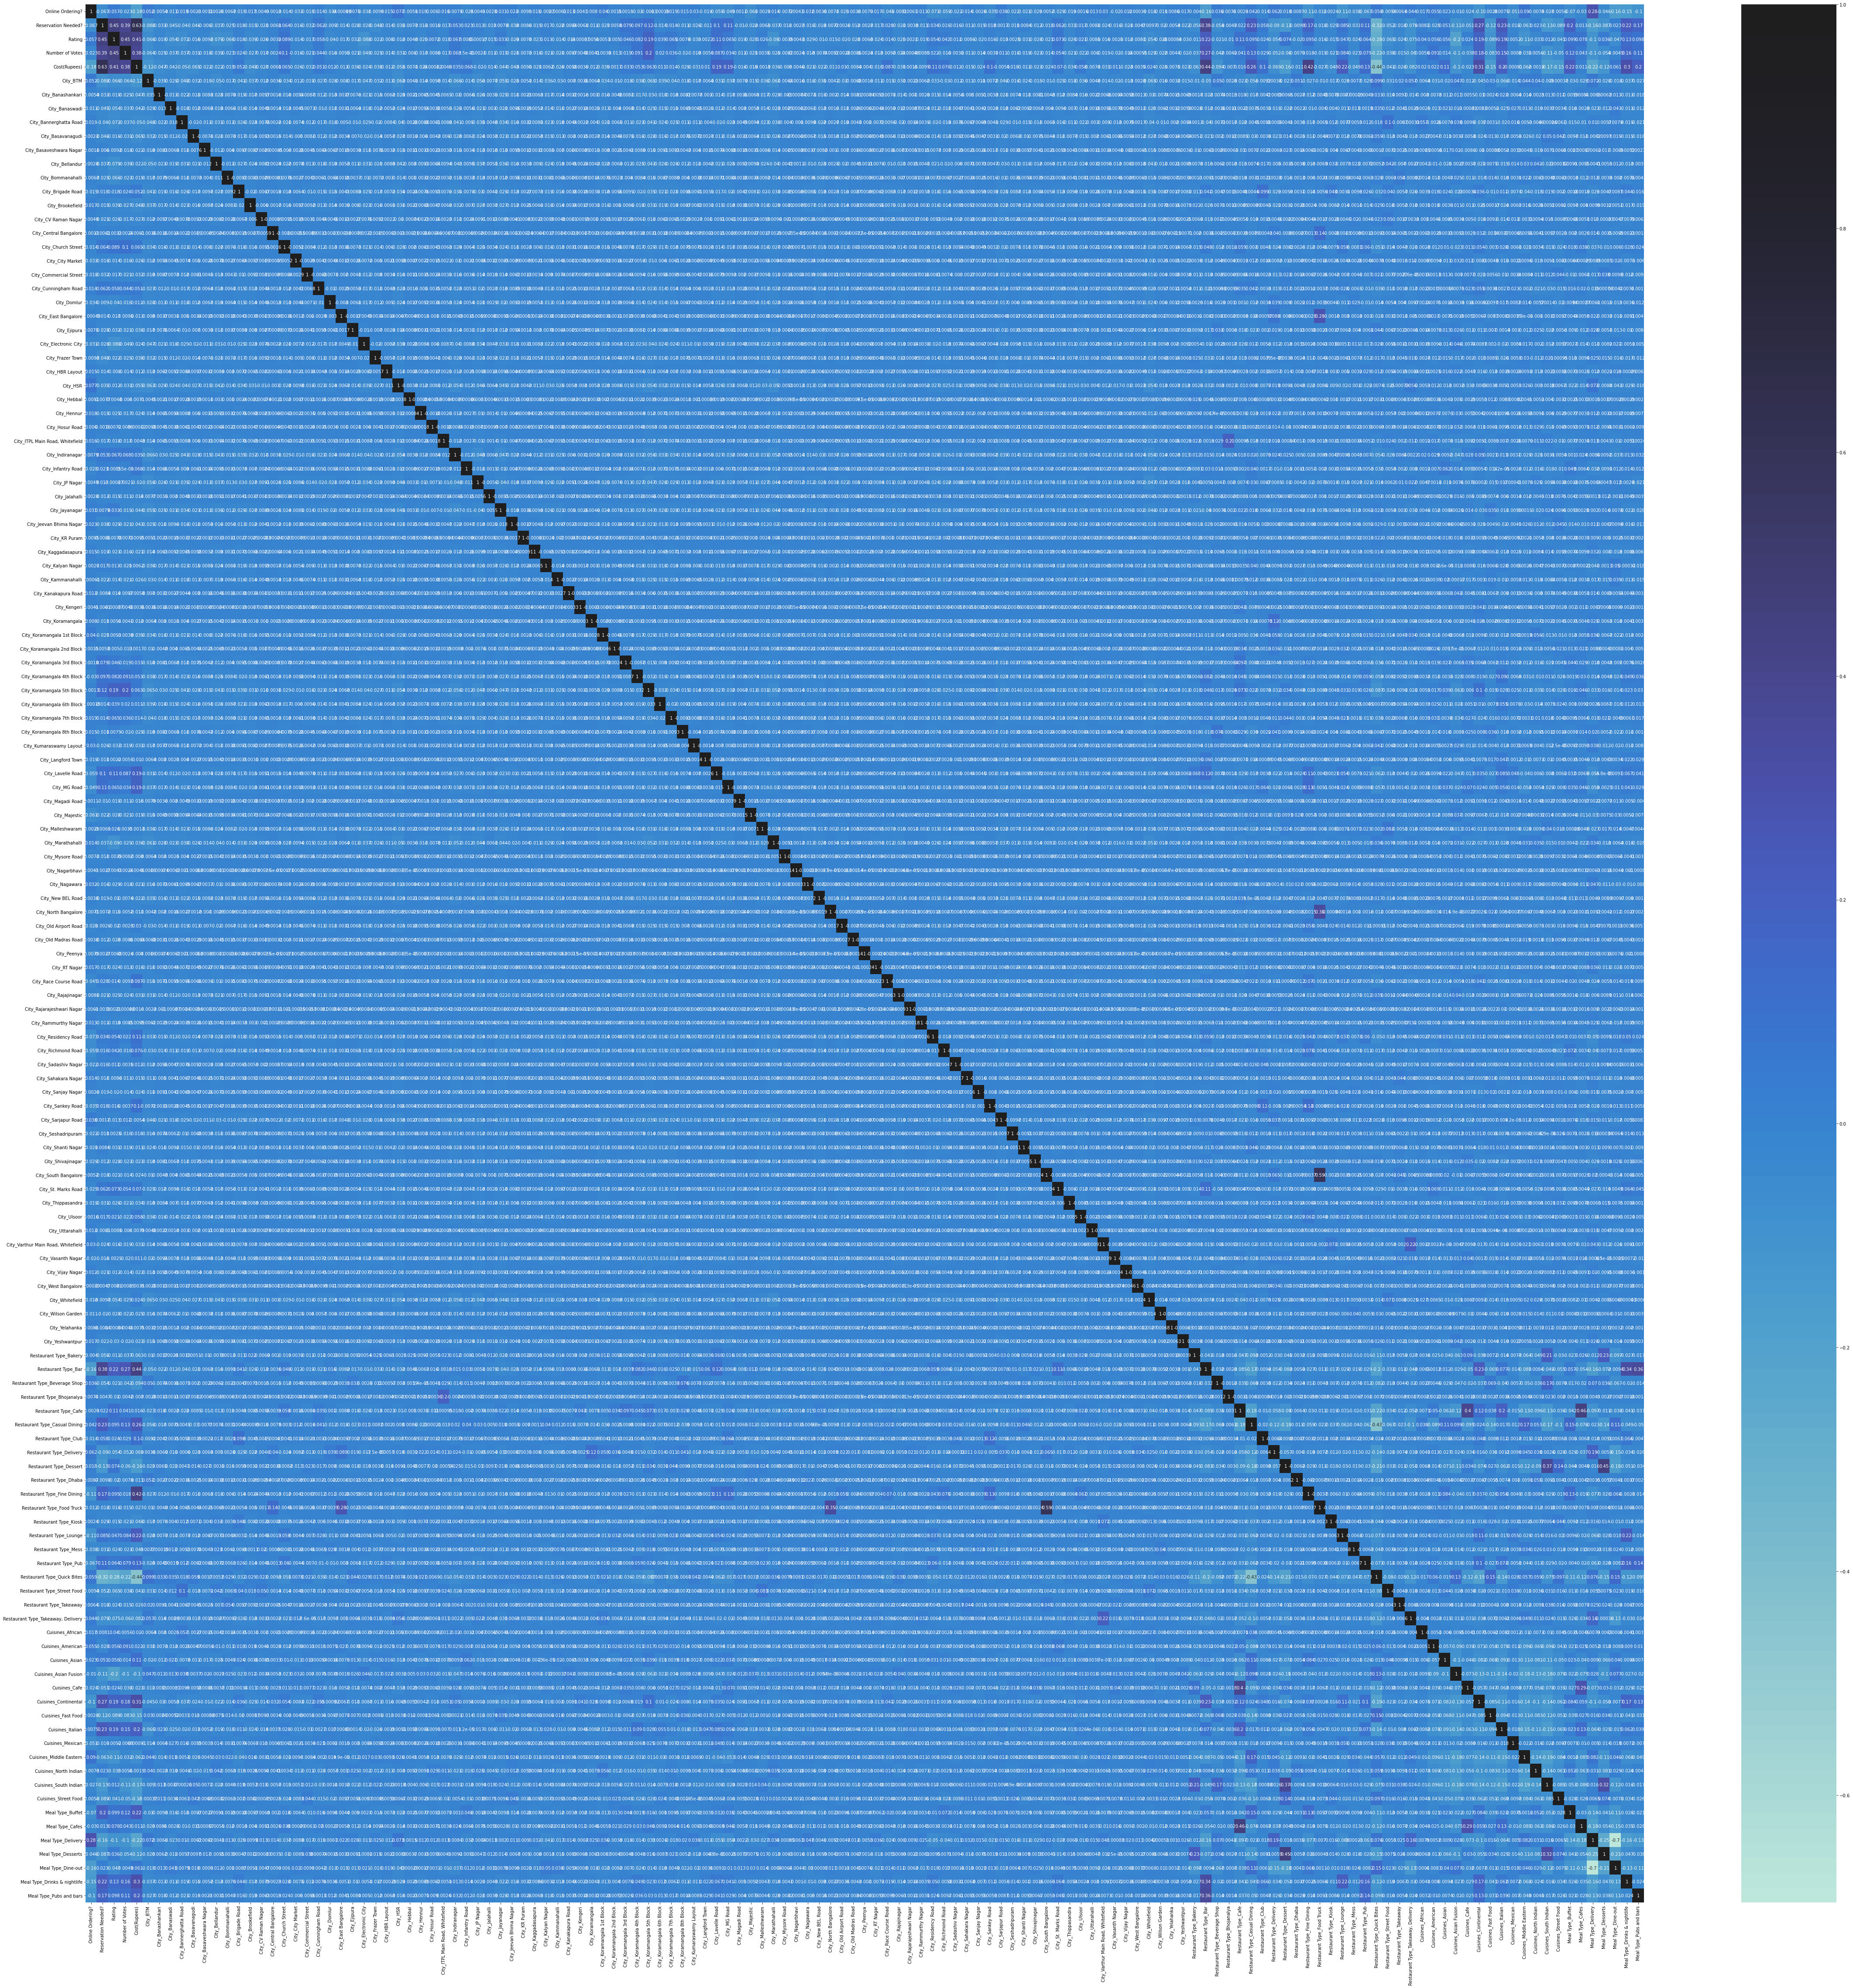

In [51]:
plt.figure(figsize = (80, 80))
corr=data_norm.corr()
sns.heatmap(corr, annot = True, center=1)
plt.show()

<Figure size 1152x720 with 0 Axes>

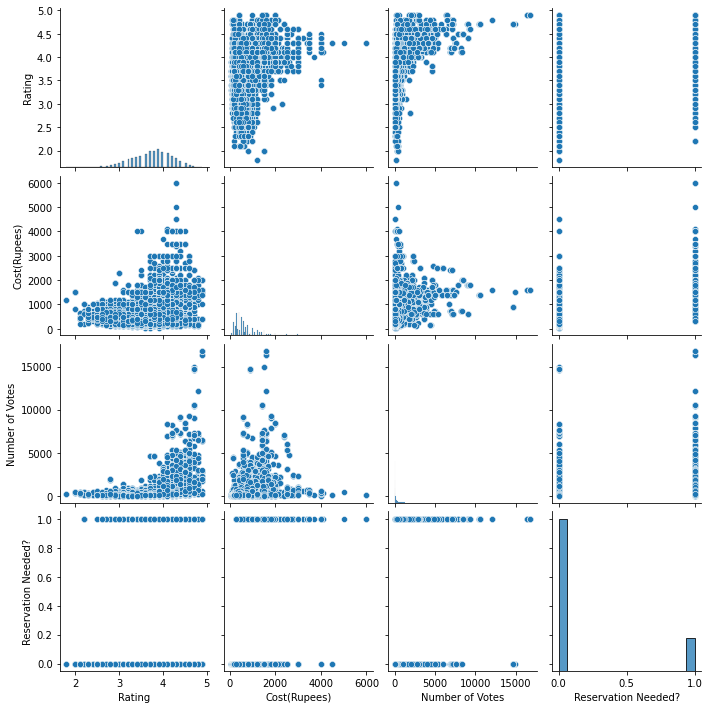

In [52]:
plt.figure(figsize=(16,10))
sns.pairplot(data_norm,  vars=['Rating','Cost(Rupees)', 'Number of Votes', 'Reservation Needed?'])
plt.show()

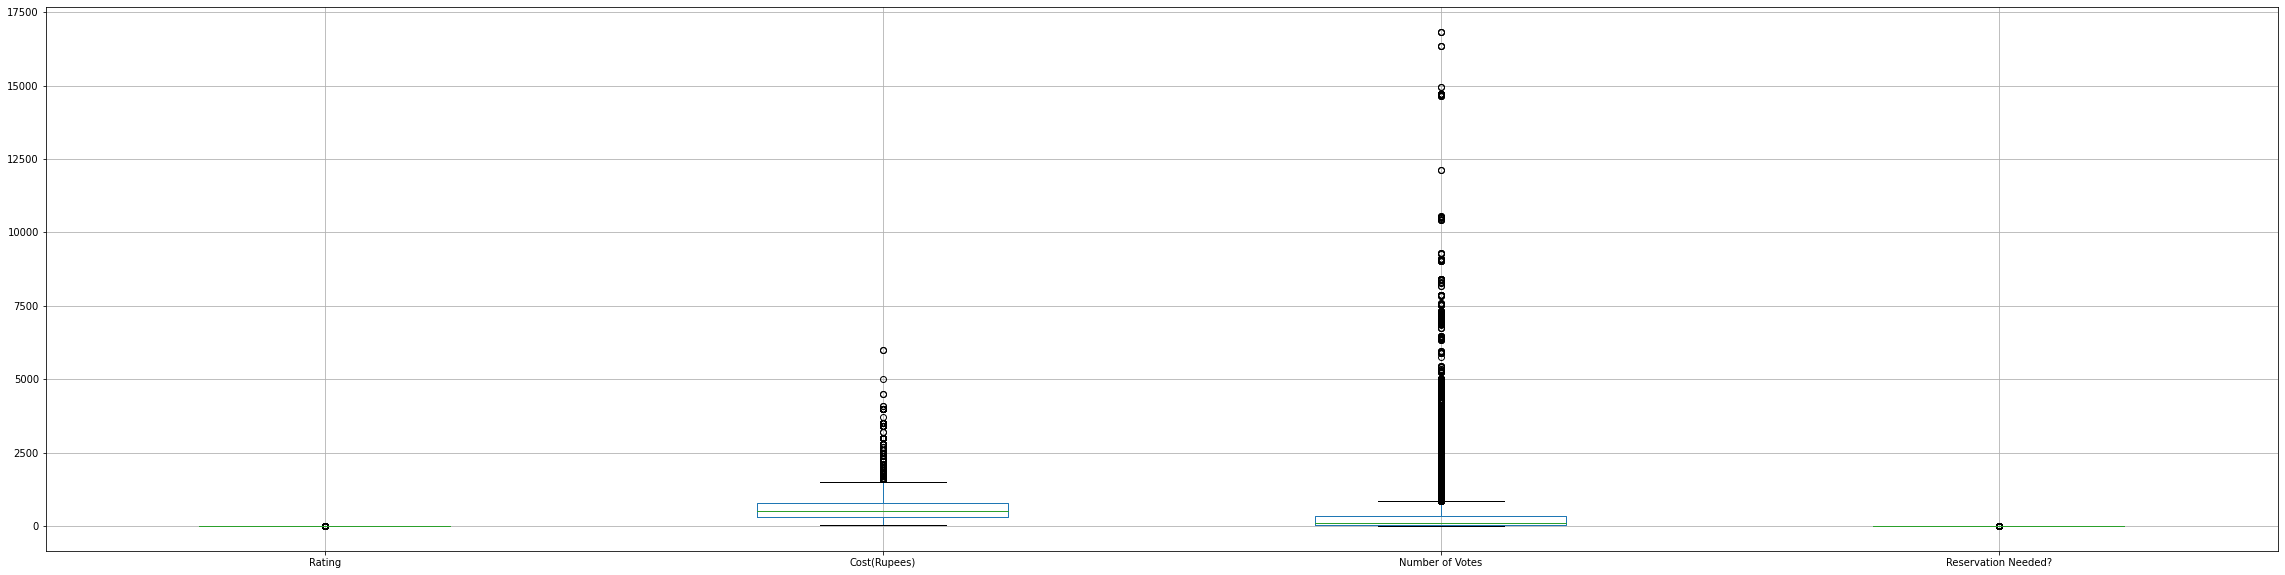

In [53]:
plt.figure(figsize=(40,10))
data_norm.boxplot(column=['Rating','Cost(Rupees)', 'Number of Votes', 'Reservation Needed?'])

1.   Number of Votes
2.   Cost of Rupees
3. Reservation Needed




**In the multivariate models are predictor variables independent of all the other predictor variables?**

In [54]:
#Compute VIF data for each independent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = data_norm.columns
vif["vif_Factor"] = [variance_inflation_factor(data_norm.values, i) for i in range(data_norm.shape[1])]
vif

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


features  vif_Factor
0                Online Ordering?    1.219583
1             Reservation Needed?    2.031350
2                          Rating    1.689793
3                 Number of Votes    1.468768
4                    Cost(Rupees)    4.260843
..                            ...         ...
132            Meal Type_Delivery         inf
133            Meal Type_Desserts         inf
134            Meal Type_Dine-out         inf
135  Meal Type_Drinks & nightlife         inf
136       Meal Type_Pubs and bars         inf

[137 rows x 2 columns]

It is usually considered to be highly correlated if the VIF value is higher than 5. None of the values we were looking at show a VIF value of 5 so we can assume there is no multicollinearly. 

**Is the relationship significant?**

In [55]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data_norm['Rating'], data_norm[['Number of Votes', 'Cost(Rupees)', 'Reservation Needed?']], axis =1).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.691
Model:                            OLS   Adj. R-squared (uncentered):              0.691
Method:                 Least Squares   F-statistic:                          2.206e+04
Date:                Mon, 07 Nov 2022   Prob (F-statistic):                        0.00
Time:                        17:10:29   Log-Likelihood:                         -63919.
No. Observations:               29638   AIC:                                  1.278e+05
Df Residuals:                   29635   BIC:                                  1.279e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Number of Votes         0.0002   1.33e-05     11.768      0.000       0.000       0.000
Cost(Rupees)            0.0043   2.18e-05    199.419      0.000       0.004       0.004
Reservation Needed?    -1.6047      0.040    -39.943      0.000      -1.683      -1.526
==============================================================================
Omnibus:                    16556.574   Durbin-Watson:                   0.833
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           182474.315
Skew:                          -2.494   Prob(JB):                         0.00
Kurtosis:                      14.086   Cond. No.                     3.98e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

According to the low p-value and high t-statistic, we can say that the relationship between rating and the number of votes,cost, and need for reservation.



# Building the Model

##Initializing H2O


In [56]:
min_mem_size=6 
run_time=333

In [57]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

5


In [58]:
#installing dependencies
!pip install eli5
!pip install -q kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
h2o.init(strict_version_check=False) # start h2o

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.16" 2022-07-19; OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04); OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp31f1sg5w
  JVM stdout: /tmp/tmp31f1sg5w/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp31f1sg5w/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ----------------------------------
H2O_cluster_uptime:         06 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.38.0.2
H2O_cluster_version_age:    11 days
H2O_cluster_name:           H2O_from_python_unknownUser_d98er3
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.172 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.7.15 final
--------------------------  ----------------------------------

In [60]:
# set this to True if interactive (matplotlib) plots are desired
interactive = True
if not interactive: matplotlib.use('Agg', warn=False)
import matplotlib.pyplot as plt

In [61]:
#Viewing data 
data = h2o.H2OFrame(data_clean)
data.shape
data.describe()
data.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:29638
Cols:9

Online Ordering?    Reservation Needed?    Rating              Number of Votes     City          Restaurant Type    Cuisines        Cost(Rupees)       Meal Type
-------  ------------------  ---------------------  ------------------  ------------------  ------------  -----------------  --------------  -----------------  -----------
type     int                 int                    real                int                 enum          enum               enum            int                enum
mins     0.0                 0.0                    1.8                 0.0                                                                  40.0
mean     0.648019434509751   0.17929684864025913    3.7328497199541175  425.3797827113847                                                    634.0447398609892
maxs     1.0                 1.0                    4.9                 16832.0                                                              6000.0
sigma    0.4775960041068574  0.3836071607362359     0.4521880727433133  1007.2929150656364                                                   480.9124985000013
zeros    10432               24324                  0                   19                                                                   0
missing  0                   0                      0                   0                   0             0                  0               0                  0
0        1.0                 1.0                    4.1                 775.0               Banashankari  Casual Dining      Middle Eastern  800.0              Buffet
1        1.0                 0.0                    4.1                 787.0               Banashankari  Casual Dining      Asian Fusion    800.0              Buffet
2        1.0                 0.0                    3.8                 918.0               Banashankari  Casual Dining      Italian         800.0              Buffet
3        0.0                 0.0                    3.7                 88.0                Banashankari  Quick Bites        North Indian    300.0              Buffet
4        0.0                 0.0                    3.8                 166.0               Basavanagudi  Casual Dining      North Indian    600.0              Buffet
5        1.0                 0.0                    3.8                 286.0               Basavanagudi  Casual Dining      North Indian    600.0              Buffet
6        0.0                 0.0                    3.6                 8.0                 Mysore Road   Casual Dining      Asian Fusion    800.0              Buffet
7        1.0                 1.0                    4.6                 2556.0              Banashankari  Casual Dining      Italian         600.0              Cafes
8        1.0                 0.0                    4.0                 324.0               Banashankari  Cafe               Italian         700.0              Cafes
9        1.0                 0.0                    4.2                 504.0               Banashankari  Cafe               Italian         550.0              Cafes
[29638 rows x 9 columns]

Online Ordering?    Reservation Needed?    Rating    Number of Votes  City          Restaurant Type    Cuisines          Cost(Rupees)  Meal Type
------------------  ---------------------  --------  -----------------  ------------  -----------------  --------------  --------------  -----------
                 1                      1       4.1                775  Banashankari  Casual Dining      Middle Eastern             800  Buffet
                 1                      0       4.1                787  Banashankari  Casual Dining      Asian Fusion               800  Buffet
                 1                      0       3.8                918  Banashankari  Casual Dining      Italian                    800  Buffet
                 0                      0       3.7                 88  Banashankari  Quick Bites        North Indian               300  Buffet
                 0                      0       3.8                166  Basavanagudi  Casual Dining      North Indian               600  Buffet
                 1                      0       3.8                286  Basavanagudi  Casual Dining      North Indian               600  Buffet
                 0                      0       3.6                  8  Mysore Road   Casual Dining      Asian Fusion               800  Buffet
                 1                      1       4.6               2556  Banashankari  Casual Dining      Italian                    600  Cafes
                 1                      0       4                  324  Banashankari  Cafe               Italian                    700  Cafes
                 1                      0       4.2                504  Banashankari  Cafe               Italian                    550  Cafes
[10 rows x 9 columns]

##Predicting Rating

In [62]:
train, test = data.split_frame(seed = 1234, destination_frames = ["train.hex", "test.hex"])

In [63]:
# assign target and inputs for logistic regression
y = 'Rating'
X = [name for name in train.columns if name != y]
print(y)
print(X)

Rating
['Online Ordering?', 'Reservation Needed?', 'Number of Votes', 'City', 'Restaurant Type', 'Cuisines', 'Cost(Rupees)', 'Meal Type']


In [64]:
aml = H2OAutoML(max_runtime_secs=run_time,exclude_algos = ['DeepLearning'])

In [65]:
aml.train(x=X,y=y,training_frame=train)  # Change training_frame=train

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_2_AutoML_1_20221107_171103

No summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.01103769548632749
RMSE: 0.10506043730314228
MAE: 0.07103862379006097
RMSLE: 0.024198383064784553
Mean Residual Deviance: 0.01103769548632749
R^2: 0.9471829121668861
Null degrees of freedom: 9970
Residual degrees of freedom: 9967
Null deviance: 2083.9221765567895
Residual deviance: 110.0568616941714
AIC: -16627.23106080492

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.041853021227000534
RMSE: 0.20458010955857986
MAE: 0.13325738740267323
RMSLE: 0.046687965189691476
Mean Residual Deviance: 0.041853021227000534
R^2: 0.7947303922524187
Null degrees of freedom: 22310
Residual degrees of freedom: 22307
Null deviance: 4549.182157150448
Residual deviance: 933.7827565956089
AIC: -7480.120106079089

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.133292   0.00341089  0.135484      0.131157      0.135172      0.13631       0.128339
mean_residual_deviance  0.0418682  0.00225393  0.0441464     0.0402433     0.0420058     0.0439382     0.039007
mse                     0.0418682  0.00225393  0.0441464     0.0402433     0.0420058     0.0439382     0.039007
null_deviance           909.836    19.8913     917.73        898.038       884.887       911.18        937.347
r2                      0.794662   0.0106332   0.786871      0.79985       0.794762      0.78247       0.809359
residual_deviance       186.757    9.35249     195.569       179.727       181.591       198.205       178.691
rmse                    0.204557   0.00552153  0.21011       0.200607      0.204953      0.209614      0.197502
rmsle                   0.0466823  0.00124208  0.0478141     0.045698      0.046782      0.0479518     0.0451658

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [81]:
print(aml.get_leaderboard().head(20))

model_id                                                     rmse        mse       mae      rmsle    mean_residual_deviance
StackedEnsemble_AllModels_2_AutoML_1_20221107_171103     0.20458   0.041853   0.133257  0.046688                  0.041853
StackedEnsemble_BestOfFamily_3_AutoML_1_20221107_171103  0.204585  0.041855   0.133263  0.0466895                 0.041855
StackedEnsemble_AllModels_3_AutoML_1_20221107_171103     0.204595  0.041859   0.133274  0.0466914                 0.041859
StackedEnsemble_BestOfFamily_2_AutoML_1_20221107_171103  0.2046    0.0418611  0.133265  0.0466929                 0.0418611
StackedEnsemble_AllModels_1_AutoML_1_20221107_171103     0.204605  0.0418633  0.133272  0.0466943                 0.0418633
DRF_1_AutoML_1_20221107_171103                           0.208549  0.0434929  0.133731  0.0477212                 0.0434929
GBM_4_AutoML_1_20221107_171103                           0.209182  0.0437571  0.133803  0.0478829                 0.0437571
StackedEnse

##Answer Questions For Each Model
 

###Default Random Forest

In [72]:
drfmodel = h2o.get_model(aml.leaderboard[5,'model_id'])
drfmodel.algo

'drf'

In [73]:
perf = drfmodel.model_performance(test)
perf

ModelMetricsRegression: drf
** Reported on test data. **

MSE: 0.037034686523483504
RMSE: 0.1924439828196338
MAE: 0.12105873562119457
RMSLE: 0.04406212839294696
Mean Residual Deviance: 0.037034686523483504

**Are any model assumptions violated?**

No formal distributional assumptions, random forests are non-parametric and can thus handle skewed and multi-modal data as well as categorical data that are ordinal or non-ordinal.


**Does the model make sense?**

**Does regularization help?**

**Which hyperparameters are important?**

###Gradient Boosting Machine

In [75]:
gbmmodel = h2o.get_model(aml.leaderboard[6,'model_id'])
gbmmodel.algo

'gbm'

In [76]:
perf = gbmmodel.model_performance(test)
perf

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.040185866631528025
RMSE: 0.20046412804172228
MAE: 0.1281097085290815
RMSLE: 0.045846676469426056
Mean Residual Deviance: 0.040185866631528025

**Are any model assumptions violated?**

*Assumes that encoded integer value for each variable has ordinal relation.*

In our data set, the categorical values that were converted to dummy variables do not have an ordinal relation because the cities, cuisine type, restaurant type, and meal type do not have a ranking. Therefore, our assumption of an ordinal relation is violated.

**Does the model make sense?**

**Does regularization help?**

**Which hyperparameters are important?**

###XGBoost

In [79]:
xgbmodel = h2o.get_model(aml.leaderboard[10,'model_id'])
xgbmodel.algo

'xgboost'

In [80]:
perf = xgbmodel.model_performance(test)
perf

ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 0.04936385032505486
RMSE: 0.22217977028760935
MAE: 0.1492812623427089
RMSLE: 0.050361191150204175
Mean Residual Deviance: 0.04936385032505486

**Are any model assumptions violated?**

*The main assumptions of XGBoost are:*

* *XGBoost may assume that encoded integer values for each input variable have an ordinal relationship*
* *XGBoost assume that your data may not be complete (i.e. it can deal with missing values)*


In our data set, the categorical values that were converted to dummy variables do not have an ordinal relation because the cities, cuisine type, restaurant type, and meal type do not have a ranking. Therefore, our assumption of an ordinal relation is violated.

**Does the model make sense?**

**Does regularization help?**

**Which hyperparameters are important?**

###Extremely Randomized Forest

**Are any model assumptions violated?**

No formal distributional assumptions, random forests are non-parametric and can thus handle skewed and multi-modal data as well as categorical data that are ordinal or non-ordinal.

**Does the model make sense?**

**Does regularization help?**

**Which hyperparameters are important?**

###General Linear Model

**Are any model assumptions violated?**

*General Linear Modeling makes four assumptions: linearity, homoskedasticity (constant variance), normality, and independence.*


In [ ]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
data_temp=data_clean[['Number of Votes', 'Cost(Rupees)']]
for c in data_temp.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_temp[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

1.	Looking at the Q-Q plot above, it appears that both numeric independent variables are not normally distributed but instead follow a exponential distribution
2.	The predictors looks right skewed with a few outliers for entries for the higher values

In [ ]:
print("Skewness of Votes: %f" % data_clean['Number of Votes'].skew())
print("Kurtosis of Votes: %f" % data_clean['Number of Votes'].kurt())
print("Skewness of Cost: %f" % data_clean['Cost(Rupees)'].skew())
print("Kurtosis of Cost: %f" % data_clean['Cost(Rupees)'].kurt())

Double checking we see an indeed right skewness of both variables. The high kurtosis tells us that the data has heavier tails (or outliers). 

Additionally, based off the pairplots, we see datasets have heteroskedasticity as the variance for Number of Votes and Cost is not constant over time.

The dataset does display variable independence as all VIF scores are below 5. 

Therefore, linearity, normality, and homoskedasticity are violated.

**Does the model make sense?**

**Does regularization help?**

**Which hyperparameters are important?**

# Conclusion

From the analysis done above on the data set, it is clear that there is multicolinearity and ecxpet length all other dependent variables are significant.



# References

1. Sckit learn offcial documentation
2. Refered Towards Data Science
3. Eli5 official documentation
4. https://towardsdatascience.com/multi-collinearity-in-regression-fe7a2c1467ea
5. https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python/notebook

The algorithms were referred directly from the **Sckit learn official documentation**. Visualization was referred from the  Machine Learning with scikit-learn Quick Start Guide and **Towards Data Science** (How do you check the quality of your regression model in Python?).  The remaining code was written independently. Feature importance reference is taken from **eli5 offical documnetation** 







